In [10]:
import torch
import torch.nn as nn
import numpy as np

import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from new_datasets import data_preprocessing
from model import Voxels,Nerf
from ml_helpers import training
import rendering

In [11]:
data_set_path = '/home/eiyike/Desktop/phdproject/MY_NERf2222/new_code_update1/Dataset'
mode = 'test'
target_size = (400,400)
dataset = data_preprocessing(data_set_path,mode,target_size=target_size)


test_o, test_d, target_px_values,total_data = dataset.get_rays()

focal_length:  555.5555155968841
(200, 4, 4)
[[ 0.1253337   0.64965808 -0.74982381 -3.02263665]
 [-0.99211466  0.08207121 -0.09472512 -0.38184923]
 [ 0.          0.75578356  0.65482146  2.6396699 ]
 [ 0.          0.          0.          1.        ]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
size:  (200, 400, 400, 4)
size:  (200, 400, 400, 3)
200 160000
######################################################################
ray origin is: (200, 160000, 3)
ray direction is: (200, 160000, 3)
target pixel values is: (200, 160000, 3)


In [12]:
device='cuda'
tn=2
tf=6


In [13]:
model = torch.load('model_nerf').to(device)

In [14]:
def mse2psnr(mse):
    return 20 * np.log10(1 / np.sqrt(mse))


@torch.no_grad()
def test(model, o, d, tn, tf, nb_bins=100, chunk_size=10, H=400, W=400, target=None):
    o = o.chunk(chunk_size)
    d = d.chunk(chunk_size)

    image = []
    for o_batch, d_batch in zip(o, d):
        img_batch = rendering.rendering(model, o_batch, d_batch, tn, tf, nb_bins=nb_bins, device=o_batch.device)
        image.append(img_batch)  # N, 3
    image = torch.cat(image)
    image = image.reshape(H, W, 3).cpu().numpy()

    return image

In [15]:
img = test(model, torch.from_numpy(test_o[0]).to(device).float(), torch.from_numpy(test_d[0]).to(device).float(),
                tn, tf, nb_bins=100, chunk_size=10)

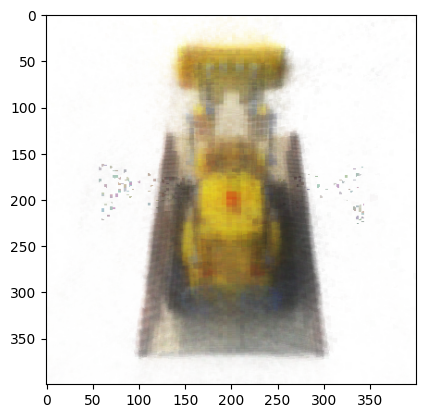

In [16]:

#image generated using nerf
plt.imshow(img)

In [16]:

#real image
plt.imshow(target_px_values[0].reshape(400,400,3))